<p style="text-align: center;"><b>DSA312 Data Science with Python</b></p>
<p style="text-align: center;"><b>Author: Jing Rong GOH</b></p>
<p style="text-align: center;"><b>Assignment 2</b></p>
<p style="text-align: center;"><b>Note: This assignment has 7 questions (Q1-Q5 are 10 marks each, Q6-Q7 are 5 marks each)</b></p>
<p style="text-align: center;"><b>Note: Points may be deducted for overly verbose or inefficient code. Bonus credit will be awarded for concise and elegant solutions.</b></p>

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Q1
Using the Breast Cancer dataset (`load_breast_cancer`) from `sklearn.datasets`, perform a logistic regression (without regularization) to predict whether a tumor is benign or malignant (`target`) based on the features: `mean radius`, `mean texture`, and `mean perimeter`. Where necessary, set seed values and/or random_state to `1`; set max_iter=`10000`.

##### (a) Use the model specification above to fit the entire Breast Cancer dataset. Using the fitted model, get the corresponding predicted `target` values and subsequently generate the confusion matrix. From the Confusion Matrix, report the True Positive, True Negative, False Positive and False Negative values.
##### (b) Use the values from the confusion matrix in `Q1a` to calculate the F1 score manually using the F1 Score formula. In addition, use an appropriate function from `sklearn` to compute the corresponding F1 score. Compare the two calculated F1 scores. Are they the same or different? Explain why.
##### (c) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Fit the logistic regression model (without regularization) using the training set. Calculate and report the F1-score on the validation set.
##### (d) Fit a Lasso Logistic Regression model (L1 regularization) with a penalty of `C = 0.6`. What is the F1 Score of the Lasso Logistic Regression model on the validation set?
##### (e) Based on the F1 Scores, which model (with or without regularization) performs better on the validation set?
##### (f) For the Lasso Logistic Regression model (L1 regularization), change the penalty to `C = 1e99`. What do you expect the resulting F1 Score to be on the validation set? Is the actual result aligned with your expectation? Explain your answer.

In [59]:
# Q1
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


In [71]:
# Q1a
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

X=df[['mean radius', 'mean texture', 'mean perimeter']].values
y=df['target'].values

logreg_model = LogisticRegression(penalty=None, random_state=1)
logreg_model.fit(X,y)

y_pred = logreg_model.predict(X)

# Confusion Matrix
print(confusion_matrix(y, y_pred))
      

# Answer: true positive is 339, true negative is 184, false
#         positive is 28 while the false negative is 18.

[[184  28]
 [ 18 339]]


In [73]:
# Q1b
F1 = 339/ (339+0.5*(28+18))

print(f"F1 Score: {f1_score(y,y_pred)}")
# Answer: 0.936 

F1 Score: 0.93646408839779


In [75]:
# Q1c
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

X = df[['mean radius', 'mean texture','mean perimeter']].values  
y = df['target'].values  

# 20/80 split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and fit the logistic regression model
model = LogisticRegression(penalty = None, random_state = 1)        # By default, penalty is l2 (i.e. ridge)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print(f"F1 Score: {f1_score(y_val, y_pred)}")

# Answer: 0.904

F1 Score: 0.9041095890410958


In [77]:
# Q1d
X = df[['mean radius', 'mean texture','mean perimeter']].values 
y = df['target'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and fit logistic regression model
model = LogisticRegression(penalty = 'l1', 
                           C = 0.6, 
                           solver = 'liblinear', 
                           max_iter = 10000,
                           random_state = 1)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print(f"F1 Score: {f1_score(y_val, y_pred)}")
# Answer: 0.914

F1 Score: 0.9140271493212669


In [ ]:
# Q1e

# Answer:

In [ ]:
# Q1f

# Answer:

### Q2
Use the California housing dataset (`fetch_california_housing`) from `sklearn.datasets` for this question, the objective is to predict the median house price `target` based on all available features in the dataset. Where necessary, set seed values and/or random_state to `1`. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated.
##### (a) Use the entire dataset to generate a simple decision tree with a maximum depth of 3. Visualize the tree structure and its decision boundaries.
##### (b) Using the decision tree from `Q2a`, state the average value of the median house price in the dataset.
##### (c) Using the decision tree from `Q2a`, calculate the Sum Squared Residuals (SSR) at the root node (i.e. top node). Calculate the Sum Squared Residuals (SSR) at the leaf nodes (i.e. terminal nodes). Calculate the corresponding percentage reduction in SSR between the root and leaf nodes.
##### (d) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the decision tree from `Q2a` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.
##### (e) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Fit a full decision tree (i.e. no need to set `max_depth`) on the training data. Calculate and report the MSE on the validation set.
##### (f) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform Bagging (using 200 trees) on the training data. Calculate and report the MSE on the validation set.
##### (g) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform Random Forest (using 200 trees) on the training data. Calculate and report the MSE on the validation set.
##### (h) Which model above is the best? Why? What is the most important feature in this best model?.

In [81]:
# Q2 Load Libraries Here
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


Mean Squared Error with max_depth=2: 0.6203646616157066


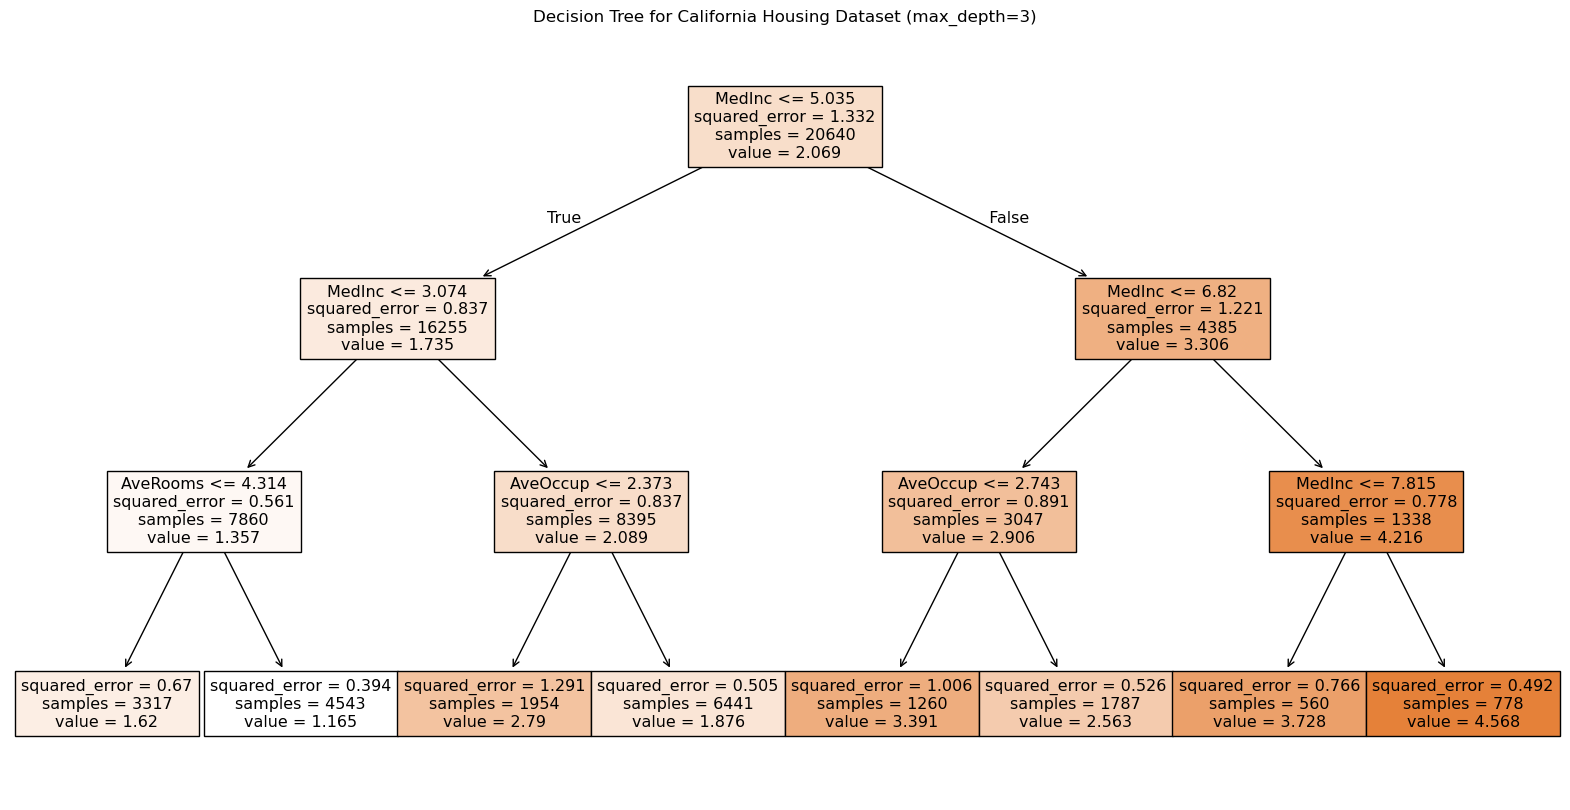

In [83]:
# Q2a
data = fetch_california_housing()
X = data.data
y = data.target

tree_model = DecisionTreeRegressor(max_depth=3, random_state=1)      
                                                                       
tree_model.fit(X, y)

# Predict with trained model
y_pred = tree_model.predict(X)

# Evaluate model's performance with MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error with max_depth=2: {mse}")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=data.feature_names, filled=True)    # filled = True adds color, where color intensity increases with the mean response value
plt.title("Decision Tree for California Housing Dataset (max_depth=3)")
plt.show()

In [ ]:
# Q2b

# Answer: 2.069

In [101]:
# Q2c
ssr_rootnode = 1.332*20640
print(ssr_rootnode)
ssr_terminalnode = (0.67*3317) + (0.394*4543) + (1.291*1954) + (0.505*6441) + (1.006*1260) + (0.526*1787) + (0.766*560) + (0.492*778)
print(ssr_terminalnode)

perc_ssr_reduction = (ssr_rootnode - ssr_terminalnode)/ssr_rootnode * 100
print(perc_ssr_reduction)

# Answer:27492.480000000003
# 12806.908999999998
# 53.416683398514806

27492.480000000003
12806.908999999998
53.416683398514806


In [ ]:
# Q2d

# Answer:

In [ ]:
# Q2e

# Answer:

In [ ]:
# Q2f

# Answer:

In [ ]:
# Q2g

# Answer:

In [ ]:
# Q2h

# Answer:

### Q3
Use the California housing dataset (`fetch_california_housing`) from `sklearn.datasets` for this question, the objective is to predict the median house price `target` based on all available features in the dataset. Where necessary, set seed values and/or random_state to `8`. Where applicable, ensure the data is suitably standardized. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated.

##### (a) Perform a K-Nearest Neighbors (KNN) regression on the entire dataset using `K=3` and report the corresponding MSE.
##### (b) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the fitted KNN regression from `Q3a` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.
##### (c) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform a KNN regression using `K=3` on the training data. Calculate and report the MSE on the validation set.
##### (d) Perform hyperparameter tuning to find the optimal value of K for KNN, using K values ranging from 1 to 20, with 5-folds cross validation strategy. Report the optimal K and the corresponding cross-validated MSE. Fit the optimal KNN model on the training data and report the MSE on the validation set.
##### (e) Refit the optimal KNN model using the entire dataset and report the corresponding MSE.
##### (f) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the fitted optimal KNN regression from `Q3e` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.

In [ ]:
# Q3 Load Libraries Here


In [ ]:
# Q3a

# Answer:

In [ ]:
# Q3b

# Answer:

In [ ]:
# Q3c

# Answer:

In [ ]:
# Q3d

# Answer:

In [ ]:
# Q3e

# Answer:

In [ ]:
# Q3f

# Answer:

### Q4.
Use the Wine dataset (`load_wine`) from `sklearn.datasets` for this question, where the objective is to perform Principal Component Analysis (PCA) on the dataset containing 13 features (i.e., chemical properties of different wines). Where applicable, ensure the data is suitably standardized.
##### (a) Perform PCA on the standardized wine dataset using all available features. How many Principal Components are generated? 
##### (b) What is the eigenvector for the Second Principal Component?
##### (c) State the loading scores for the Second Principal Component in simple English.
##### (d) Which feature is the most important in influencing the Second Principal Component? Explain your answer.
##### (e) Report the Principal Component scores for the first three observations projected onto the 2nd PC.
##### (f) What is the eigenvalue for the Second Principal Component?
##### (g) What is the proportion of total variation explained by the Second Principal Component?
##### (h) Generate a scree plot with appropriate titles and axis.

In [ ]:
# Q4 Load Libraries Here


In [ ]:
# Q4a.

# Answer:

In [ ]:
# Q4b.

# Answer:

In [ ]:
# Q4c

# Answer:

In [ ]:
# Q4d

# Answer:

In [ ]:
# Q4e

# Answer:

In [ ]:
# Q4f

# Answer:

In [ ]:
# Q4g

# Answer:

In [ ]:
# Q4h


### Q5. 
Use the Diabetes dataset (`load_diabetes`) from `sklearn.datasets` for this question, where the objective is to predict the progression of the disease (`target`) based on all available features. Set all seed values and random_state to `1` for reproducibility where necessary. Where applicable, use `adam` as the optimizer, with a batch size of `32`, and epochs is `1000`. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated. Where applicable for neural networks, ensure the data is suitably standardized.

##### (a) Perform a multiple linear regression on the entire dataset. Report the Mean Squared Error (MSE).
##### (b) Perform a multiple linear regression using 70% of the data for training and 30% for validation. Report the validation MSE.
##### (c) Use a neural network structure with 2 hidden layers, with each layer having 2 hidden nodes with the softplus activation function; having one node in the output layer with the linear activation function. Fit the model on the entire dataset and report the MSE.
##### (d) Using the same neural network architecture from `Q5c`, fit the model using 70% of the data for training and 30% for validation. Report the validation MSE.
##### (e) Use a neural network structure with 64 nodes in the first hidden layer and 32 nodes in the second hidden layer (both using softplus); having one node in the output layer with the linear activation function. Fit the model on the entire dataset and report the MSE.
##### (f) Using the same neural network architecture from `Q5e` but use 70% of the data for training and 30% for validation. Report the validation MSE.
##### (g) Using the same neural network architecture from `Q5e` but change the activation function to relu. Report the MSE.
##### (h) Using the same neural network architecture from `Q5g` but use 70% of the data for training and 30% for validation. Report the validation MSE.
##### (i) Without further calculations, which model from `Q5a` to `Q5h` performs the best? Explain your answer.
##### (j) Without further calculations, using the best model from `Q5i` to fit the entire dataset, what will the MSE be? Explain your answer.
##### (k) Without further calculations, which model from `Q5a` to `Q5h` performs the worst? Explain your answer. Suggest the problem that is causing the poor performance and identify ways to improve performance of this model.

In [ ]:
# Q5 Load Libraries Here


In [ ]:
# Q5a

# Answer:

In [ ]:
# Q5b

# Answer:

In [ ]:
# Q5c

# Answer:

In [ ]:
# Q5d

# Answer:

In [ ]:
# Q5e

# Answer:

In [ ]:
# Q5f

# Answer:

In [ ]:
# Q5g

# Answer:

In [ ]:
# Q5h

# Answer:

In [ ]:
# Q5i

# Answer:

In [ ]:
# Q5j

# Answer:

In [ ]:
# Q5k

# Answer:

### 






 
 
 
 
 
 
 
 
P{Q6.
Developing effective practice questions and solutions is a key indicator of topic mastery. This question requires you to create an assignment question based on any materials covered in `Lectures 1 to 6` and provide a corresponding solution.

Marks will be awarded based on following:
  - Clarity: Ensure the question is clearly and concisely phrased, leaving no ambiguity for the student. 
  - Accuracy: The solution provided must be correct and aligned with the concepts taught in the lectures.
  - Structured Solution: The solution must be well-structured, showing logical steps from problem statement to final answer.
  - Relevance: The question must focus on topics covered in `Lectures 1 to 6`.
  - Creativity: Questions should be novel and demonstrate depth in understanding. Avoid replicating questions shown in the course.

### 

### Q6 Use the healthexp dataset from Seaborn for this question. 
##### The healthexp dataset typically contains health-related expenditures and often includes variables like Country, Year, Health Expenditure.

##### (a) Load the dataset and create a new column named Spending_SGD, which is the Spending_USD converted to Singapore Dollars (assume an exchange rate of 1.3). Drop the original Spending_USD column and display the first 5 rows of the updated DataFrame.

##### (b) Filter the dataset to include only the following countries: USA, Canada, Germany, Great Britain, and France. Create a line plot to visualize the relationship between Spending_SGD and Life_Expectancy for these countries. Include the plot title "Health Expenditure vs Life Expectancy by Country." Label the x-axis as “Health Expenditure (per capita)” and the y-axis as “Life Expectancy.” Describe the trends you observe in the plot. 
Might there be a point of diminishing returns to healthcare spending? Add annotations to the line plot to indicate maximum life expectancy for each country.
Hint: Use a for loop to iterate through each country 

##### (c) Using the filtered dataset, create an interactive line plot using Plotly Express that shows how Spending_SGD changes over time (Year) for each country. Include the plot title "Health Expenditure Over Time by Country." What insights can you draw from the interactive plot regarding trends over the years? Assign different colors to each country. Add hovering tooltips that display Country, Year and Life Expectancy at each data point.

##### (d) Using the filtered dataset, group the data by Country and calculate the average Spending_SGD for each country for the year 2020. Display the results as a new DataFrame. What is the average Spending_SGD for Canada in 2020? Verify that these results match the information displayed on the hover tooltips in part (c). 
                                                                                                                                                                

In [53]:
# Q6 Answer here
# Load Libraries here
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.tools as tls


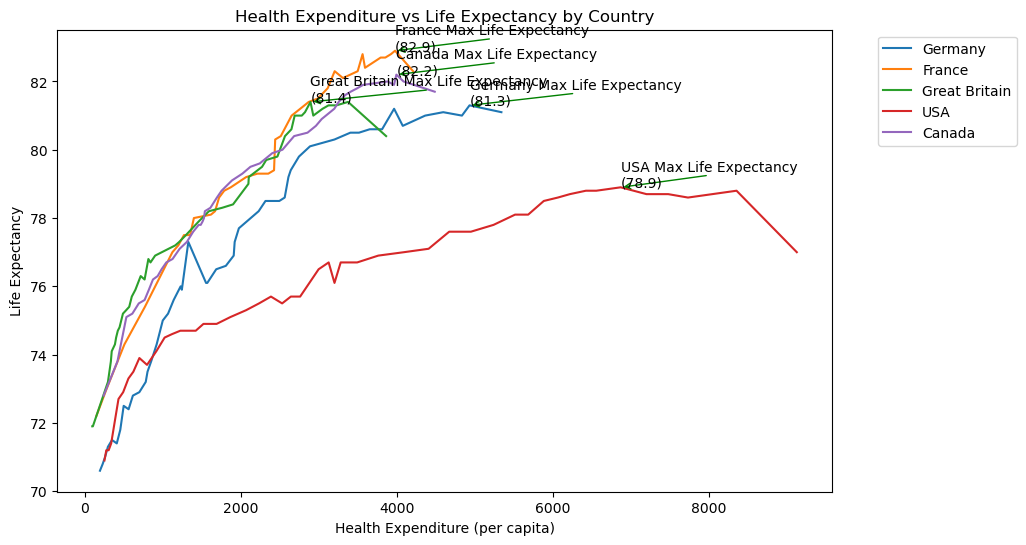

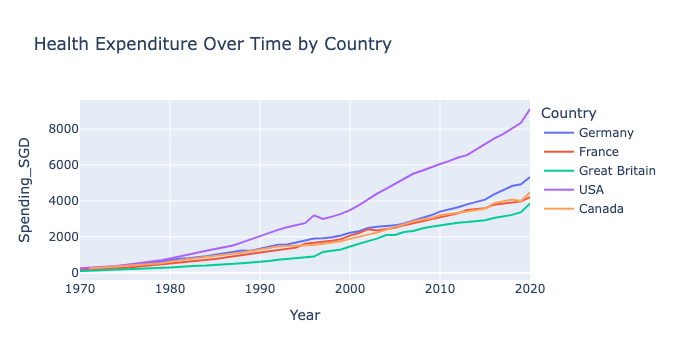

,,Spending_SGD
Country,Year,
Canada,2020,4483.33
France,2020,4206.48
Germany,2020,5337.68
Great Britain,2020,3860.54
USA,2020,9122.45


In [133]:
# Consolidated
# (a)
# Load the healthexp dataset
df = sns.load_dataset('healthexp')  

# Adding a new column and name it 'Spending_SGD'
df['Spending_SGD'] = df['Spending_USD'] / 1.3

# Dropping the original 'Spending_USD' column 
df = df.drop(columns=['Spending_USD'])

# Display the first 5 rows of the updated DataFrame
df.head()


# (b)
# Filter for a few countries to make it more readable
countries = ['USA', 'Canada', 'Germany', 'Great Britain','France']
df_filtered = df[df['Country'].isin(countries)]

# Line plot of Life Expectancy against Health Expenditure
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='Spending_SGD', y='Life_Expectancy', hue='Country')
plt.xlabel("Health Expenditure (per capita)")
plt.ylabel("Life Expectancy")
plt.title("Health Expenditure vs Life Expectancy by Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot annotations to find optimal point of health expenditure, 
# indicated by highest life expectancy 
# Annotate the maximum life expectancy for each country
for country in countries:
    country_data = df_filtered[df_filtered['Country'] == country]
    max_point = country_data.loc[country_data['Life_Expectancy'].idxmax()]
    
    # Annotate the maximum point for the country
    plt.annotate(f"{country} Max Life Expectancy\n({max_point['Life_Expectancy']})", 
                 xy=(max_point['Spending_SGD'], max_point['Life_Expectancy']),
                 arrowprops=dict(arrowstyle='->', color='green'))

plt.show()


# (c)
# Interactive line plot with Plotly Express
fig = px.line(
    df_filtered, x='Year', y='Spending_SGD', 
    color='Country',
    title="Health Expenditure Over Time by Country",
    labels={'Health Expenditure': 'Health Expenditure (per capita)', 
            'Year': 'Year'},
    hover_name='Country', 
    hover_data={'Year': True, 'Life_Expectancy': True}
            )
fig.show() 


# (d)
# Group by 'Country' and calculate the mean of 'Spending_SGD' for each country in 2020
df_2020 = df_filtered[df_filtered['Year'] == 2020]
mean_spending_2020 = df_2020.groupby(['Country', 'Year'])[['Spending_SGD']].mean()

# mean_spending_2020 = mean_spending_2020.rename(columns={'Spending_SGD': 'Mean_Spending_SGD'})
mean_spending_2020.round(2)



# Answers: 
# (b):  We can observe that there is a positive correlation between health expenditure healthcare expenditures and life expectancy.
#       There is some varability in the positive correlation among countries. Some might have lower life expectancy despite high health expenditures. (USA)
#       There seems to be some indication of diminishing marginal returns for health expenditure.
# (c):  Health expenditure has increased significantly over the years for all countries. 
#       USA displayed the highest rate of increase in healthcare spending and Great Britain displayed the lowest rate. 
# (d):  The average health-related expenditures for Canada in 2020 is $4,483.33.

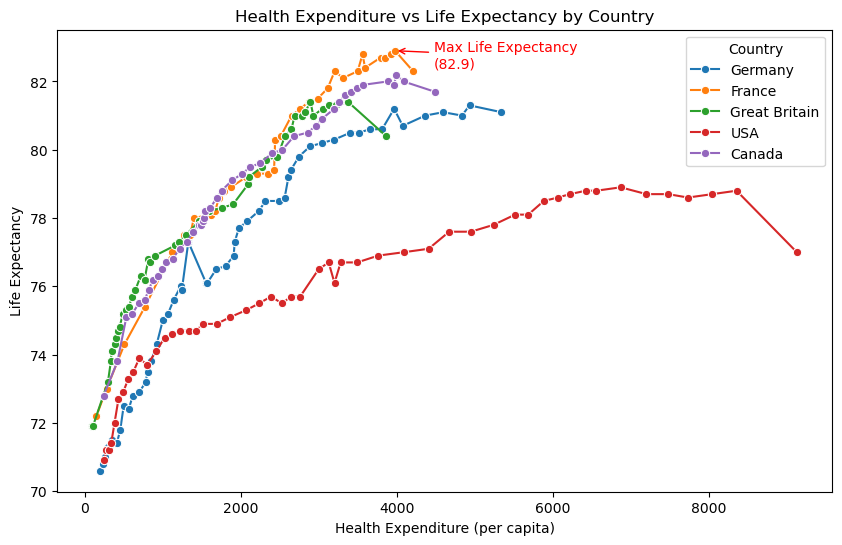

In [105]:
# Trying to figure out how to annotate on the highest life expectancy of each country's lines
# to indicate optimal expenditure on health
# Filter the dataset for specific countries
countries = ['USA', 'Canada', 'Germany', 'Great Britain', 'France']
df_filtered = df[df['Country'].isin(countries)]

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='Spending_SGD', y='Life_Expectancy', hue='Country', marker='o')

# Title and labels
plt.title('Health Expenditure vs Life Expectancy by Country')
plt.xlabel('Health Expenditure (per capita)')
plt.ylabel('Life Expectancy')

# Find and annotate the maximum point of life expectancy
max_point = df_filtered.loc[df_filtered['Life_Expectancy'].idxmax()]
plt.annotate(f"Max Life Expectancy\n({max_point['Life_Expectancy']})", 
             xy=(max_point['Spending_SGD'], max_point['Life_Expectancy']),
             xytext=(max_point['Spending_SGD'] + 500, max_point['Life_Expectancy'] - 0.5),
             arrowprops=dict(arrowstyle='->', color='red'),
             color='red')

plt.show()


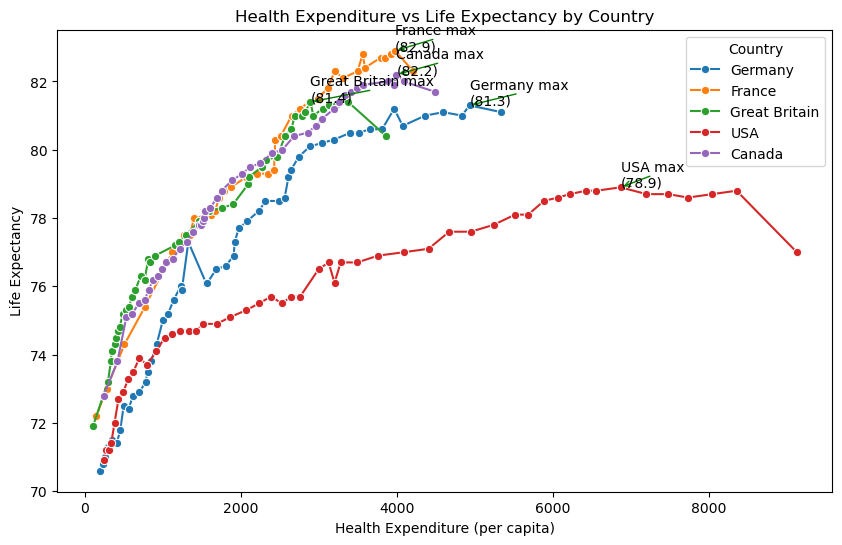

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for specific countries
countries = ['USA', 'Canada', 'Germany', 'Great Britain', 'France']
df_filtered = df[df['Country'].isin(countries)]

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='Spending_SGD', y='Life_Expectancy', hue='Country', marker='o')

# Title and labels
plt.title('Health Expenditure vs Life Expectancy by Country')
plt.xlabel('Health Expenditure (per capita)')
plt.ylabel('Life Expectancy')

# Annotate the maximum life expectancy for each country
for country in countries:
    country_data = df_filtered[df_filtered['Country'] == country]
    max_point = country_data.loc[country_data['Life_Expectancy'].idxmax()]
    
    # Annotate the maximum point for the country
    plt.annotate(f"{country} max\n({max_point['Life_Expectancy']})", 
                 xy=(max_point['Spending_SGD'], max_point['Life_Expectancy']),
                 arrowprops=dict(arrowstyle='->', color='green'))

# Display the plot
plt.show()


### Q7.
Developing effective practice questions and solutions is a key indicator of topic mastery. This question requires you to create an assignment question based on any materials covered in `Lectures 7 to 12` and provide a corresponding solution.

Marks will be awarded based on following:
  - Clarity: Ensure the question is clearly and concisely phrased, leaving no ambiguity for the student. 
  - Accuracy: The solution provided must be correct and aligned with the concepts taught in the lectures.
  - Structured Solution: The solution must be well-structured, showing logical steps from problem statement to final answer.
  - Relevance: The question must focus on topics covered in `Lectures 7 to 12`.
  - Creativity: Questions should be novel and demonstrate depth in understanding. Avoid replicating questions shown in the course.

In [7]:
# Q7 Question here


In [8]:
# Q7 Answer here
